In [5]:
#importing necessary libraries to do the assignment

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
#reading the given data file using the pandas.read_csv() method
diabetes_data = pd.read_csv("C:/Users/aleky/Downloads/diabetes.csv")

In [7]:
#printing some rows to understand the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#checking if there are any null rows (if there are null rows we need to do some processing to eliminate those rows)
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Question - A

In [9]:
#setting seed to have reproducibility
np.random.seed(666)

In [10]:
#collecting sample of 25 rows from the total population
sample_data = diabetes_data.sample(n=25)

In [11]:
#to check we got 25 rows and all the 9 columns
sample_data.shape

(25, 9)

In [12]:
#calculating the glucose mean and highest for the sample data
sample_data_glucose_mean = sample_data['Glucose'].mean()
sample_data_glucose_highest = sample_data["Glucose"].max()
print(sample_data_glucose_mean, sample_data_glucose_highest)

121.04 184


In [13]:
#calculating the glucose mean and highest for the total data
diabetes_data_glucose_mean = diabetes_data["Glucose"].mean()
diabetes_data_glucose_highest = diabetes_data["Glucose"].max()
print(diabetes_data_glucose_mean,diabetes_data_glucose_highest)

120.89453125 199


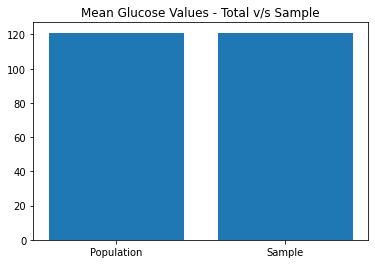

In [23]:
# Creating charts to compare the mean glucose values for both
mean_glucose_values = [diabetes_data_glucose_mean, sample_data_glucose_mean]
plt.title('Mean Glucose Values - Total v/s Sample')
x_labels = ['Population', 'Sample']
plt.bar(x_labels, mean_glucose_values)
plt.show()

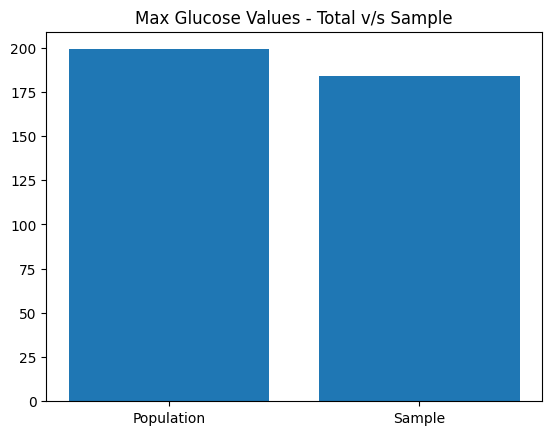

In [14]:
# Creating charts to compare the max glucose values for both
max_glucose_values = [diabetes_data_glucose_highest, sample_data_glucose_highest]
plt.title('Max Glucose Values - Total v/s Sample')
x_labels = ['Population', 'Sample']
plt.bar(x_labels, max_glucose_values)
plt.show()

# Question - B

In [22]:
sample_data_bmi_98percentile = np.percentile(sample_data['BMI'], 98)
diabetes_data_bmi_98percentile = np.percentile(diabetes_data['BMI'], 98)

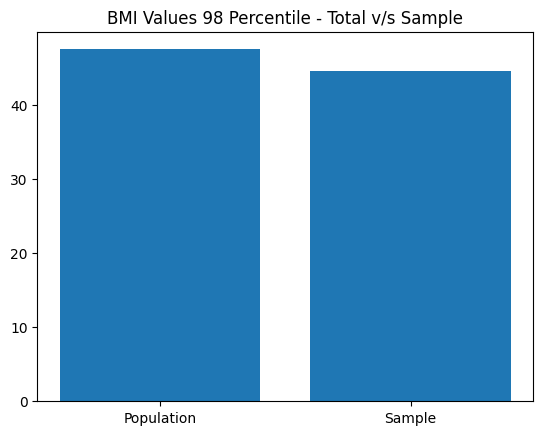

In [21]:
#creating chart and comparing the BMI vlaue for the sample data and total data
BMI_values_98percentile = [diabetes_data_bmi_98percentile, sample_data_bmi_98percentile]
plt.title('BMI Values 98 Percentile - Total v/s Sample')
x_labels = ['Population', 'Sample']
plt.bar(x_labels, BMI_values_98percentile)
plt.show()

# Question - C

In [23]:
sample_data_bp_mean = np.empty(500)
sample_data_bp_std_dev = np.empty(500)
sample_data_bp_percentile_values = np.empty(500)


for i in range(500):
    sample_data_bp = diabetes_data['BloodPressure'].sample(n=150, replace=True)
    sample_data_bp_mean[i] = sample_data_bp.mean()
    sample_data_bp_std_dev[i] = sample_data_bp.std()
    sample_data_bp_percentile_values[i] = np.percentile(sample_data_bp, 95)

In [24]:
total_data_mean = diabetes_data['BloodPressure'].mean()
total_data_std_dev = diabetes_data['BloodPressure'].std()
total_data_95percentile = np.percentile(diabetes_data['BloodPressure'], 95)

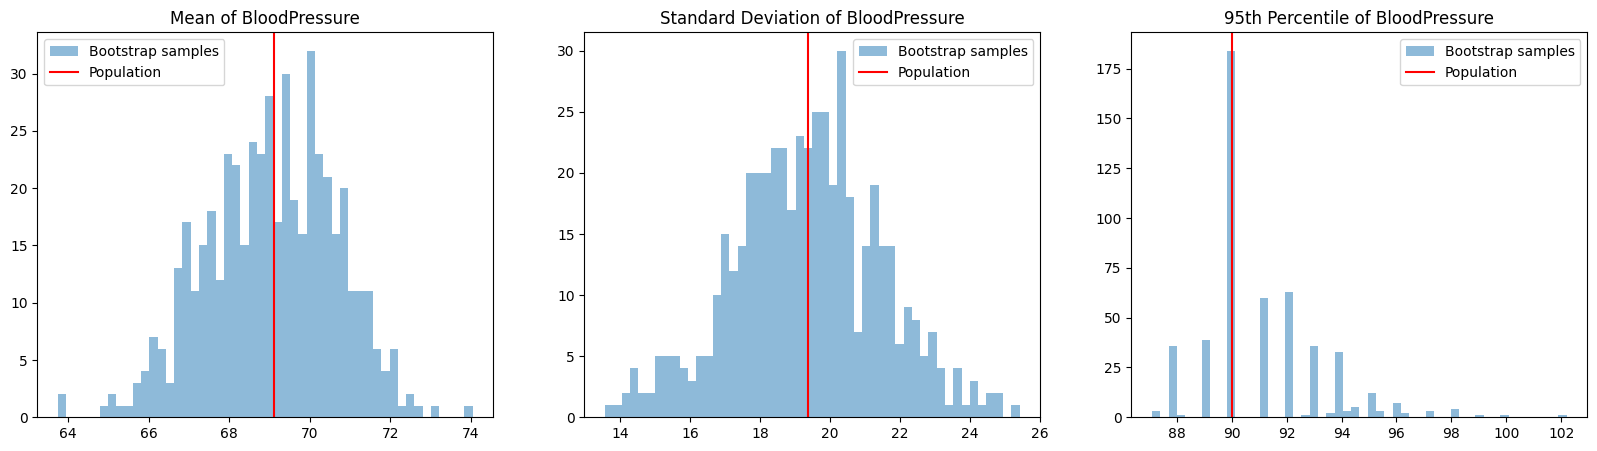

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(sample_data_bp_mean, bins=50, alpha=0.5, label='Bootstrap samples')
plt.axvline(x=total_data_mean, color='red', label='Population')
plt.title('Mean of BloodPressure')
plt.legend()

plt.subplot(132)
plt.hist(sample_data_bp_std_dev, bins=50, alpha=0.5, label='Bootstrap samples')
plt.axvline(x=total_data_std_dev, color='red', label='Population')
plt.title('Standard Deviation of BloodPressure')
plt.legend()

plt.subplot(133)
plt.hist(sample_data_bp_percentile_values, bins=50, alpha=0.5, label='Bootstrap samples')
plt.axvline(x=total_data_95percentile, color='red', label='Population')
plt.title('95th Percentile of BloodPressure')
plt.legend()

plt.show()